Resolução do sistema usando o método de Jacobi:
Iteração   1: Norma do resíduo relativo = 4.037686e-01
Iteração   2: Norma do resíduo relativo = 1.670383e-01
Iteração   3: Norma do resíduo relativo = 7.068684e-02
Iteração   4: Norma do resíduo relativo = 2.993039e-02
Iteração   5: Norma do resíduo relativo = 1.264406e-02
Iteração   6: Norma do resíduo relativo = 5.367165e-03
Iteração   7: Norma do resíduo relativo = 2.266117e-03
Iteração   8: Norma do resíduo relativo = 9.622797e-04
Iteração   9: Norma do resíduo relativo = 4.062537e-04
Iteração  10: Norma do resíduo relativo = 1.725210e-04
Iteração  11: Norma do resíduo relativo = 7.283350e-05
Iteração  12: Norma do resíduo relativo = 3.093000e-05
Iteração  13: Norma do resíduo relativo = 1.305774e-05
Iteração  14: Norma do resíduo relativo = 5.545203e-06
Iteração  15: Norma do resíduo relativo = 2.341021e-06
Iteração  16: Norma do resíduo relativo = 9.941569e-07

Solução aproximada:
x[0] = 4.999997
x[1] = 4.999994
x[2] = 4.999994
x[3

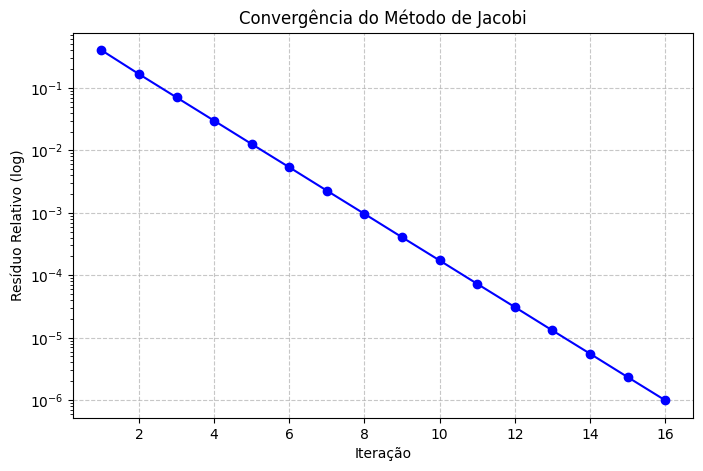

In [1]:
import math
import matplotlib.pyplot as plt

def metodo_jacobi(matriz_coeficientes, vetor_constantes, tolerancia, max_iteracoes):
    """
    Resolve iterativamente o sistema linear A*x = b utilizando o método de Jacobi.

    Parâmetros:
      matriz_coeficientes : lista de listas representando a matriz dos coeficientes.
      vetor_constantes : lista representando o vetor independente.
      tolerancia : tolerância para o resíduo relativo para convergência.
      max_iteracoes : número máximo de iterações permitidas.

    Retorna:
      solucao : vetor solução aproximada.
      historico_residuos : lista com a norma do resíduo relativo em cada iteração.
      iteracoes_realizadas : número de iterações executadas.
    """
    tamanho_sistema = len(matriz_coeficientes)
    solucao_atual = [0.0 for _ in range(tamanho_sistema)]

    norma_vetor_constantes = math.sqrt(sum(valor**2 for valor in vetor_constantes))
    if norma_vetor_constantes == 0:
        norma_vetor_constantes = 1  # Previne divisão por zero

    historico_residuos = []

    for iteracao in range(1, max_iteracoes + 1):
        nova_solucao = [0.0 for _ in range(tamanho_sistema)]

        for indice_linha in range(tamanho_sistema):
            soma_termos_linha = 0.0
            for indice_coluna in range(tamanho_sistema):
                if indice_coluna != indice_linha:
                    soma_termos_linha += matriz_coeficientes[indice_linha][indice_coluna] * solucao_atual[indice_coluna]

            nova_solucao[indice_linha] = (vetor_constantes[indice_linha] - soma_termos_linha) / matriz_coeficientes[indice_linha][indice_linha]

        # Cálculo do vetor resíduo
        vetor_residuo = [0.0 for _ in range(tamanho_sistema)]
        for indice_linha in range(tamanho_sistema):
            produto_matriz_vetor = sum(matriz_coeficientes[indice_linha][col] * nova_solucao[col] for col in range(tamanho_sistema))
            vetor_residuo[indice_linha] = vetor_constantes[indice_linha] - produto_matriz_vetor

        norma_residuo = math.sqrt(sum(residuo**2 for residuo in vetor_residuo))
        erro_relativo = norma_residuo / norma_vetor_constantes

        historico_residuos.append(erro_relativo)
        print(f"Iteração {iteracao:3d}: Norma do resíduo relativo = {erro_relativo:.6e}")

        if erro_relativo < tolerancia:
            return nova_solucao, historico_residuos, iteracao

        solucao_atual = nova_solucao.copy()

    return solucao_atual, historico_residuos, max_iteracoes

def principal():
    # Sistema exemplo com matriz diagonalmente dominante
    matriz_exemplo = [
        [4, -1,  0,  0],
        [-1, 4, -1,  0],
        [0, -1,  4, -1],
        [0,  0, -1,  3]
    ]
    vetor_exemplo = [15, 10, 10, 10]

    parametros_iteracao = {
        'tolerancia': 1e-6,
        'max_iteracoes': 100
    }

    print("Resolução do sistema usando o método de Jacobi:")
    solucao, historico, iteracoes = metodo_jacobi(matriz_exemplo, vetor_exemplo,
                                                parametros_iteracao['tolerancia'],
                                                parametros_iteracao['max_iteracoes'])

    print("\nSolução aproximada:")
    for indice, valor in enumerate(solucao):
        print(f"x[{indice}] = {valor:.6f}")
    print(f"\nNúmero de iterações realizadas: {iteracoes}")

    # Plotagem do histórico de convergência
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, iteracoes + 1), historico, marker='o', linestyle='-', color='blue')
    plt.title("Convergência do Método de Jacobi")
    plt.xlabel("Iteração")
    plt.ylabel("Resíduo Relativo (log)")
    plt.yscale('log')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

if __name__ == "__main__":
    principal()